# Derivación numérica: diferencias finitas

#### Eva Yazmín Santiago Santos

### NOTA
Este notebook se iniciará en la clase; la resolución completa debe ser enviada como "Tarea3.ipynb", desde su carpeta de tareas. Se puede hacer en equipo, con un máximo de dos personas. Si se hace en equipo, incluyan ambos nombres de manera clara.

En este notebook, implementarán funciones que calculan la derivada numéricamente, de una función $f(x)$ en un punto $x_0$ dado.

## Derivada *derecha*

Definan una función `derivada_derecha` que calcule *numéricamente* la derivada de una función $f(x)$ en una variable (a priori arbitaria) que se debe introducir como argumento, en un punto $x_0$ arbitrario, pero que por default lo hace en  $x_0=0.0$. 

Para esto, utilicen la definición de la derivada:

\begin{equation}
f'(x_0) = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0)}{h},
\end{equation}

que requiere la especificación de `h`. (Este método se conoce por el nombre de *diferencias finitas*.)

A fin de simular el $\lim_{h\to 0}$, consideren distintos valores de $h$ que precisamente simulen dicho límite. Para cada valor de $h$ calculen el error absoluto del cálculo numérico (respecto al valor *exacto*, que deberán conocer analíticamente). (Para ser concretos, obtengan la derivada de la función de prueba $f(x) = 3x^3-2$, en $x_0=1$.) Dibujen, como función de $h$, el error de su cálculo (usar escala logarítmica en ambos ejes puede ser una buena idea). A partir de eso, ¿qué conclusión podemos sacar sobre *la convergencia* del cálculo numérico de la derivada? 


In [382]:
using PyPlot

In [329]:
h=logspace(-10,-1,50)
function derivada_derecha(f, fe, x0)
    err = []
    for i in h
        g=fe(x0)
        fd = (f(x0+i)-f(x0))/i
        er=abs(fd-g)
        push!(err, er)
    end
    return err
end
error_d =derivada_derecha(x->3*x^3-2, x->9*x , 1);

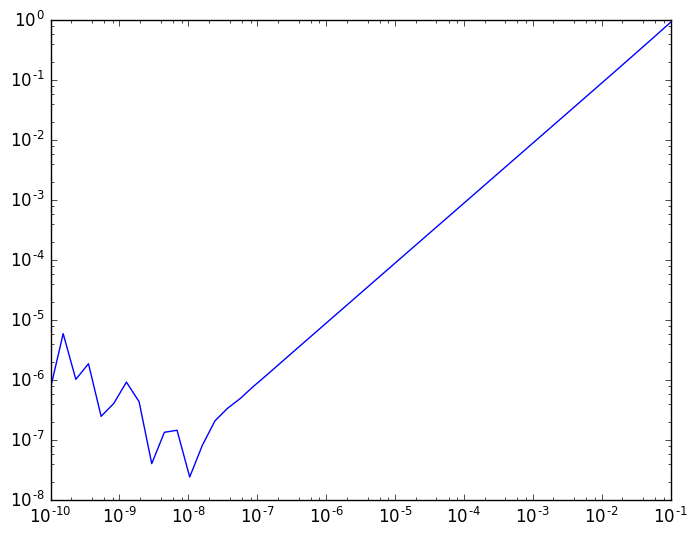

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32b289080>

In [376]:
loglog(h, error_d)

## Derivada simétrica

Repitan el ejercicio anterior usando cómo definición de la derivada la versión *simétrica* de la definición de la derivada, es decir:

\begin{equation}
f'(x_0) = \lim_{h\to 0} \frac{f(x_0+h)-f(x_0-h)}{2h}.
\end{equation}



In [331]:
h=logspace(-10,-1,50)
function derivada_simetrica(f, fe, x0)
    err = []
    for i in h
        g=fe(x0)
        fd = (f(x0+i)-f(x0-i))/(2*i)
        er=abs(fd-g)
        push!(err, er)
    end
    return err
end
error_s= derivada_simetrica(x->3*x^3-2, x->9*x , 1);

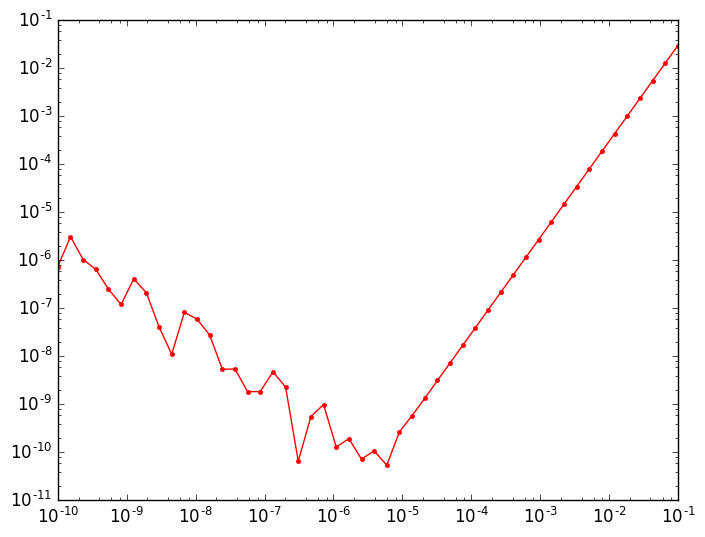

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32aa48d30>

In [377]:
loglog(h, error_s, ".r-")

## Derivada *compleja*

Repitan el ejercicio anterior considerando ahora que el incremento de la variable independiente es infinitesimal e *imaginario*. Así, tenemos la definición:

\begin{equation}
f'(x_0) = \lim_{h\to 0} \Im\Big(\frac{f(x_0+ i h)}{h}\Big).
\end{equation}


In [365]:
h=logspace(-10,-1,50)
function derivada_compleja(f, fe, x0)
    err = []
    for n in h
        g=fe(x0)
        fd = imag(f(x0-0+im*n)/(n))
        er=abs(fd-g)
        push!(err, er)
    end
    return err
end
error_c= derivada_compleja(x->3*x^3-2, x->9*x , 1);

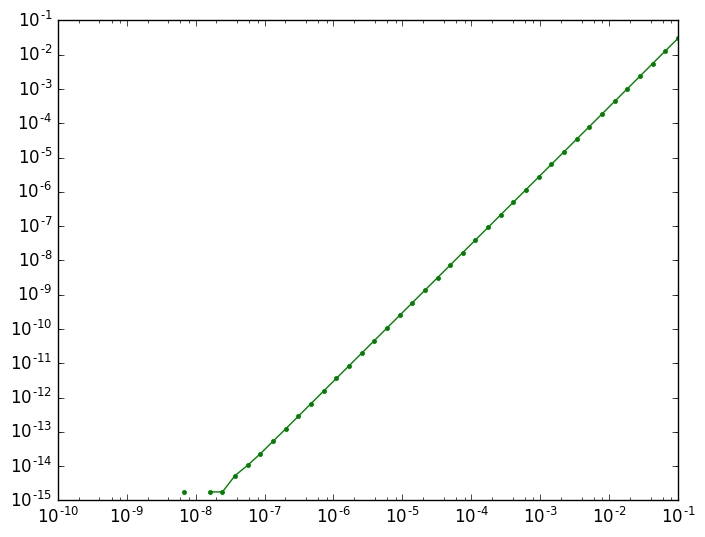

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32c0759e8>

In [378]:
loglog(h, error_c, ".g-")

## Preguntas

- ¿Cuál de las definiciones anteriores es mejor en términos de dar el valor *más exacto* de la derivada? Den un argumento sólido de su conclusión en términos del tipo de convergencia hacia el valor exacto.

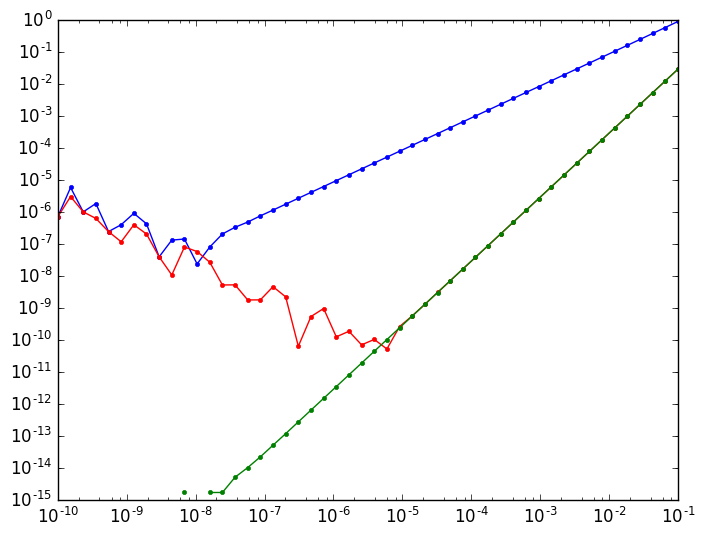

1-element Array{Any,1}:
 PyObject <matplotlib.lines.Line2D object at 0x32cdc0710>

In [381]:
loglog(h,error_d, ".b-")
loglog(h,error_s,".r-")
loglog(h,error_c,".g-")

Se puede observar en la última gráfica que la derivada *compleja* es la mejor definición ya que para valores muy pequeños, es la que muestra el menor error. Además, a medida que h se vuelve más pequeña, el error converge a cero.

- ¿Qué comportamiento de las derivadas en términos de $h$ nos incomoda (en lo más profundo de las entrañas)? ¿A qué se debe esto?

Cuando h es muy pequeña, el error de la derivada *derecha* y la derivada *simétrica* empieza a aumentar. Además, no converge a algún valor. Esto se debe a la resta entre los términos en el numerador de la definición de cada derivada. En el caso de la derivada compleja, esto no ocurre debido a que en el numerador sólo se tiene un término.